<a href="https://colab.research.google.com/github/roxasboss/TM-lyca-2018/blob/master/CIFAR10_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.datasets import cifar100
from keras import regularizers, optimizers
import numpy as np
from keras.optimizers import RMSprop

from keras.utils.np_utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#(X, y)= cifar10.load_data()
#X = X.astype("float32")
#y = y.astype("float32")

#x_train = x_train/255.0
#y = y/255.0

#print(x_train)
print(x_train.shape)
X = np.concatenate([x_train, x_test])
print(X.shape)

y = np.concatenate([y_train, y_test])
print(y.shape)

#labels
# Encode labels to one hot vectors (ex : cat -> [0,0,1,0,0,0,0,0,0,0])

y = to_categorical(y,num_classes=10)
    

X = X.astype("float32")
#normalization 
X = X/255.0

(50000, 32, 32, 3)
(60000, 32, 32, 3)
(60000, 1)


In [49]:
#split the data


from sklearn.metrics import explained_variance_score,mean_absolute_error,median_absolute_error
from sklearn.model_selection import train_test_split  



X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.1, random_state=23)
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))
 


Training instances   54000, Training features   32
Validation instances 3000, Validation features 32
Testing instances    3000, Testing features    32


(32, 32, 3)


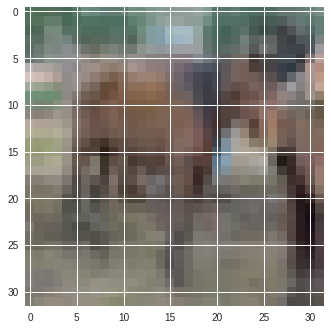

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(X_train[0])
print(X_train[0].shape)

In [51]:
print(X_train.shape)

(54000, 32, 32, 3)


In [52]:
#CNN model 3x[2x(Conv2D+relu)+pooling], flatten, fully connected layer



weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3), padding= "Same",activation = "relu",kernel_regularizer=regularizers.l2(weight_decay), input_shape = (32,32,3)))
model.add(Conv2D(32, kernel_size = (3,3), padding= "Same",kernel_regularizer=regularizers.l2(weight_decay),activation = "relu"))
model.add(MaxPooling2D(pool_size =(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size = (3,3), padding= "Same",kernel_regularizer=regularizers.l2(weight_decay),activation = "relu"))
model.add(Conv2D(64,kernel_size = (3,3), padding= "Same",kernel_regularizer=regularizers.l2(weight_decay),activation = "relu"))
model.add(MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size = (3,3), padding= "Same",kernel_regularizer=regularizers.l2(weight_decay),activation = "relu"))
model.add(Conv2D(128,kernel_size = (3,3), padding= "Same",kernel_regularizer=regularizers.l2(weight_decay),activation = "relu"))
model.add(MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(10,activation = "softmax"))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [0]:
from keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-06, decay=1e-6)
model.compile(optimizer =optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [0]:
#data_augmentation

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [0]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [18]:
print(X_train.shape)

(54000, 32, 32, 3)


In [165]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size = 64), epochs = 50,validation_data=(X_val, y_val),verbose = 2,callbacks=[learning_rate_reduction])
                                         

Epoch 1/50
 - 38s - loss: 0.9052 - acc: 0.7197 - val_loss: 0.8078 - val_acc: 0.7607
Epoch 2/50
 - 39s - loss: 0.8910 - acc: 0.7271 - val_loss: 0.7650 - val_acc: 0.7770
Epoch 3/50
 - 39s - loss: 0.8839 - acc: 0.7303 - val_loss: 0.8837 - val_acc: 0.7460
Epoch 4/50
 - 39s - loss: 0.8731 - acc: 0.7343 - val_loss: 0.7389 - val_acc: 0.7843
Epoch 5/50
 - 38s - loss: 0.8709 - acc: 0.7373 - val_loss: 0.8547 - val_acc: 0.7533
Epoch 6/50
 - 39s - loss: 0.8663 - acc: 0.7366 - val_loss: 0.9125 - val_acc: 0.7473
Epoch 7/50
 - 39s - loss: 0.8678 - acc: 0.7370 - val_loss: 0.8566 - val_acc: 0.7550

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 8/50
 - 39s - loss: 0.7647 - acc: 0.7729 - val_loss: 0.7674 - val_acc: 0.7867
Epoch 9/50
 - 39s - loss: 0.7515 - acc: 0.7751 - val_loss: 0.6976 - val_acc: 0.8053
Epoch 10/50
 - 38s - loss: 0.7421 - acc: 0.7805 - val_loss: 0.6902 - val_acc: 0.8107
Epoch 11/50
 - 38s - loss: 0.7348 - acc: 0.7804 - val_loss: 0.7519 - val_acc: 

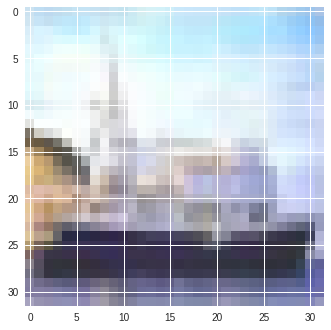

In [166]:
plt.imshow(X_train[120])

In [0]:
X_pred = np.reshape(X_train[118],(1,32,32,3))

In [0]:
print(X_train[100])

In [0]:
print(X_pred)

In [168]:
model.predict(X_pred,steps = 1)

array([[1.6296612e-05, 3.9722769e-07, 3.9205410e-08, 4.9847156e-08,
        1.5195624e-08, 7.8680853e-11, 1.3701101e-09, 2.4980333e-09,
        9.9997711e-01, 6.0374746e-06]], dtype=float32)

The algorithm has trouble to distinguish cats and dogs as well as planes and birds.
Some classes seem to be easy to notice 

In [20]:
model.save_weights()

TypeError: ignored

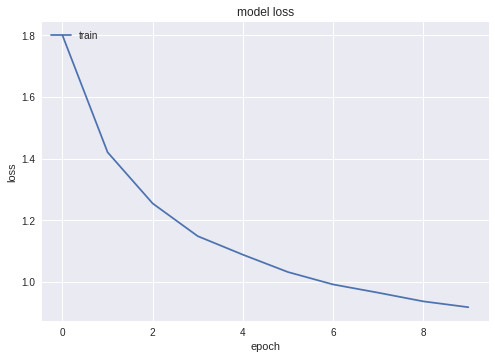

In [21]:
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [41]:
model.save_weights

<bound method Sequential.save_weights of <keras.models.Sequential object at 0x7f014e6a5b70>>

In [43]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print(loss_and_metrics)

3000/3000 [==============================] - 0s 162us/step
[0.5416899622281393, 0.8440000004768372]


In [0]:
#what happens when we try to put a type of image which isn't in the training set

In [0]:
#import image

In [0]:
(x_train2, y_train2), (x_test2, y_test2) = cifar100.load_data()

In [0]:
x = np.concatenate([x_train2, x_test2])

In [0]:
x = x/255.0

In [0]:
#df = pd.DataFrame(records, columns=features)

In [6]:
#x_train.info()

AttributeError: ignored

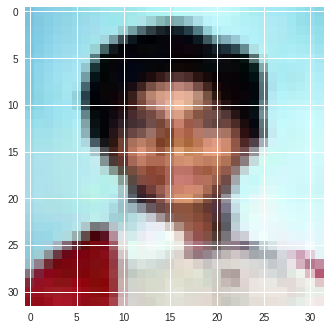

In [159]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(x[3])

In [0]:
x_pred = np.reshape(x[3], (1,32,32,3))
                    

In [38]:
print(x_pred.shape)

(1, 32, 32, 3)


In [0]:
print(x_pred)

In [169]:
model.predict(x_pred,steps = 1)

array([[8.2334066e-07, 1.6686894e-08, 2.8237343e-01, 1.2516475e-03,
        4.1340718e-05, 7.1569061e-01, 6.4150075e-04, 5.1435171e-07,
        3.3688018e-08, 6.8747532e-08]], dtype=float32)

In [0]:
#according to the official cifar site first class([1,0,0,0,0,0,0,0,0,0]) is a plane, 2 is car, 3 bird, 4 cat, 5 deer, 6 dog, 7 frog, 8 horse, 9 ship, 10 truck 
#the network tries to determine what kind of image it is but he is unsure. 2 classes,however, have lower values : bird and dog. It seems like the network sometimes can understand that the image is an animal and not an object

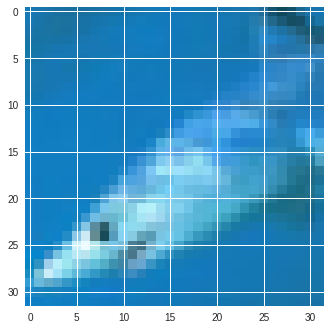

In [191]:
plt.imshow(x[50])

In [192]:
x_pred1 = np.reshape(x[50], (1,32,32,3))
model.predict(x_pred1,steps = 1)

array([[9.3998924e-02, 2.1841193e-03, 1.6891565e-04, 4.7892583e-05,
        4.0340594e-05, 2.3572316e-06, 8.5125512e-06, 3.8221742e-06,
        9.0308225e-01, 4.6289840e-04]], dtype=float32)

here the closest are the ship and the plane, which is quite accurate

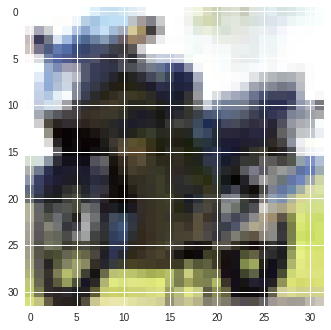

In [250]:
plt.imshow(x[195])

In [251]:
x_pred2 = np.reshape(x[195], (1,32,32,3))
model.predict(x_pred2,steps = 1)

array([[3.0720297e-02, 3.8116552e-02, 5.8150012e-04, 7.2194221e-03,
        1.0179380e-03, 8.5296563e-04, 2.4466116e-02, 3.0033246e-01,
        1.3911034e-04, 5.9655368e-01]], dtype=float32)

the 2 closest one are the horse and the truck. It's once again somehow accurate since a motorcyle is a bit a mix of an horse and a truck